In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import tensorboard
from pylab import rcParams

In [48]:
# Loading The Data
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
# # Configuring Modules
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale = 1.5)
rcParams['figure.figsize'] = 14, 8
Random_Seed = 42

In [50]:
# Renaming Columns
df.rename(columns = {"Class": "Fraud"}, inplace = True)

In [51]:
# Checking Data For Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0
dtype: int64

OUR DATA CONTAINS NO NULL VALUES

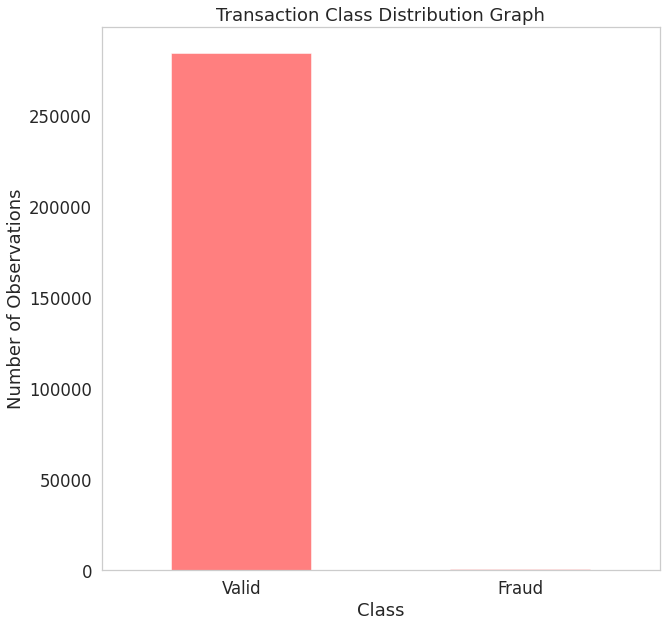

In [52]:
# Transaction Class Distribution Plot
labels = ['Valid', 'Fraud']
plt.figure(figsize = (10,10))
count_classes = pd.value_counts(df['Fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color = 'red', alpha = 0.5)
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution Graph")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.grid()
plt.show()

In [53]:
len(df)

284807

There are total 284807 number of transactions

In [54]:
len_fraud = len(df[df.Fraud ==  1])
len_fraud

492

Out of 284807 transactions 492 are the fraud transactions

In [55]:
len_valid = 284807 - 492
len_valid

284315

Out of 284807 transactions 284315 are the valid transactions

In [56]:

perc_fraud = (len_fraud * 100) / len(df)
perc_fraud

0.1727485630620034

### As you can see out of total transactions only **0.17 %** are the fraud transactions. It means that we have highly **Imbalance Dataset** in our hands. There is a **large margin** between the valid transactions and the fraud transactions.

In [57]:
# Making DataFrames Of Valid And Fraud Transactions To Check Important Stats
Fraud_df = df[df.Fraud == 1]
Valid_df = df[df.Fraud == 0]

In [58]:
# Checking Important Stats of Amount used in Fraud Transactions
Fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [59]:
# Checking Imprtant Stats of Amount used in Valid Transactions
Valid_df.Amount.describe()



count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

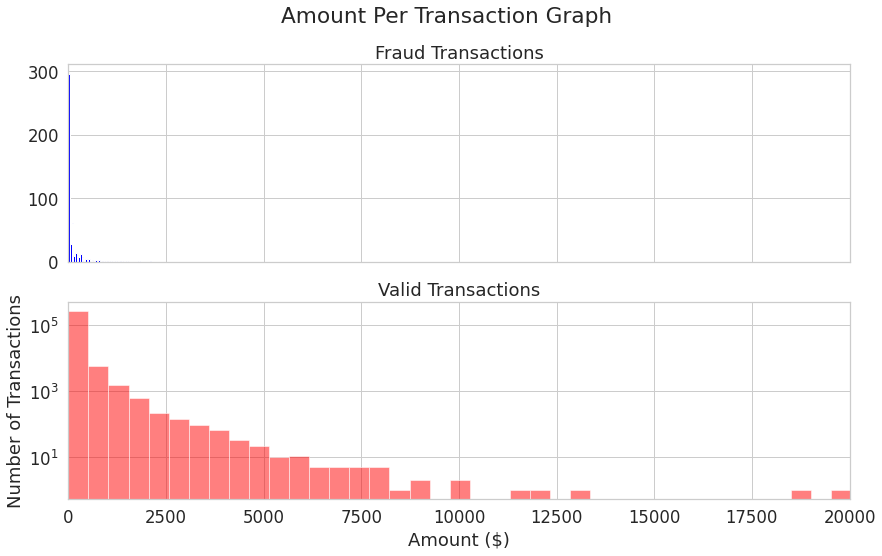

In [60]:
# Amount per transaction by class


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount Per Transaction Graph')

bins = 50

ax1.hist(Fraud_df.Amount, bins = bins, color='blue')
ax1.set_title('Fraud Transactions')

ax2.hist(Valid_df.Amount, bins = bins, color='red', alpha = 0.5)
ax2.set_title('Valid Transactions')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

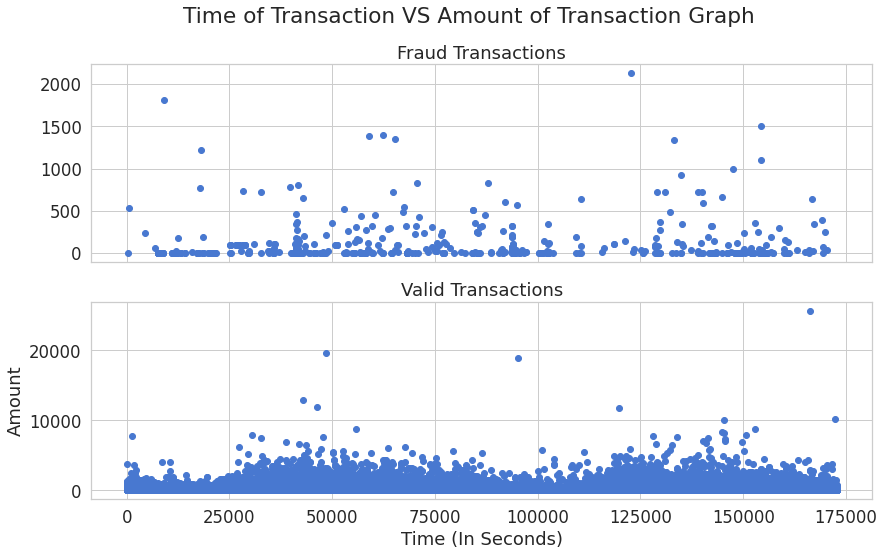

In [61]:


# Time of transaction vs Amount by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction VS Amount of Transaction Graph')

ax1.scatter(Fraud_df.Time, Fraud_df.Amount)
ax1.set_title('Fraud Transactions')

ax2.scatter(Valid_df.Time,Valid_df.Amount)
ax2.set_title('Valid Transactions')

plt.xlabel('Time (In Seconds)')
plt.ylabel('Amount')
plt.show()

In [62]:
# Normalizing Data

# We Need To Normalize Two Features: Time And Amount
from sklearn.preprocessing import StandardScaler
df_norm = df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

Splitting Dataset Into Testing and Training Data

In [63]:
# Training Data
train_data = df_norm.iloc[:199365,:]
train_data.shape

(199365, 31)

In [64]:
# Testing Data
test_data = df_norm.iloc[199365:,:]
test_data.shape

(85442, 31)

In [65]:
# Shuffling Training And Testing Data
train_data = train_data.sample(frac=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
51533,-1.048976,0.973589,-0.643713,0.793057,0.495459,-0.710463,0.655105,-0.752266,0.262682,0.845504,-0.191253,-1.155546,-0.269115,0.096311,-0.150692,1.978057,0.879938,-0.757800,0.372346,-0.636294,0.166281,0.258214,0.534309,-0.237444,-0.890258,0.212322,0.551107,0.010363,0.040329,0.185313,0
74742,-0.822962,1.184561,-0.202022,-0.699687,-0.012383,0.030743,-0.921186,0.487977,-0.315552,0.041715,-0.099680,-1.150072,-0.617967,-0.766152,0.639805,0.937303,0.210172,-0.406596,-0.280795,0.409537,0.096713,-0.052641,-0.399791,-0.267204,-0.381238,0.593334,1.114471,-0.140171,-0.001816,0.082362,0
181793,0.638353,-0.289859,1.749597,-0.562436,4.051860,1.493352,1.390328,0.539786,0.638814,-2.433808,1.667213,-0.800007,-0.599200,-0.499205,1.051584,-0.676168,-0.164770,0.024303,0.640099,2.057165,0.231211,0.087763,0.260417,-0.162329,-0.478106,-0.374447,0.416189,0.314860,0.173556,-0.273268,0
78375,-0.785795,1.260940,-0.232888,0.464343,-0.285892,-0.622840,-0.351529,-0.336600,0.045918,0.525965,-0.216003,0.834034,0.971408,-0.233323,0.041459,-0.673658,0.130384,-0.227269,-0.316213,0.995661,-0.069920,-0.311421,-0.765448,0.073202,0.081818,0.144835,1.129042,-0.091601,-0.012792,-0.349231,0
130655,-0.324542,-3.469377,0.565120,-0.608331,-2.576538,-0.710003,0.240302,-0.952566,2.049209,0.551127,-2.242098,0.167964,1.708724,0.723035,1.204569,1.978921,-0.828109,1.216438,-1.933222,-1.798101,-0.478722,0.224659,0.453068,0.265987,-0.907778,-0.193696,-0.226663,-0.126961,-0.307649,-0.351230,0


In [66]:
test_data = test_data.sample(frac = 1)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
250100,1.261646,-0.861561,0.479845,-0.463140,-2.604302,0.726719,-2.705760,2.308107,-0.870600,-0.013777,-1.712063,0.096531,0.755360,0.027861,0.702966,-0.357163,-1.680262,0.150706,-0.753684,-0.027659,-0.194623,0.424205,1.369322,-0.552009,1.066092,1.000140,0.068562,-0.070486,0.092485,0.062572,0
263456,1.392985,2.109346,-0.773027,-1.474490,-0.895177,-0.277882,-0.001369,-1.001901,0.083748,-0.215886,0.226244,0.829618,-0.147740,0.549858,-2.022935,-0.312696,2.059951,0.852184,0.249987,0.733230,0.156613,0.259987,0.740278,0.026154,0.001617,-0.073202,-0.105458,0.017516,-0.016451,-0.193346,0
275528,1.511141,2.108480,0.081377,-1.523171,0.196024,0.656642,-0.523852,0.425697,-0.456657,0.183893,-0.038171,-1.231174,1.751750,3.272734,-0.430817,-0.486147,-0.102798,-0.741074,-0.932517,0.572358,0.032121,-0.273299,-0.488884,0.105108,-0.903408,0.043961,0.326695,-0.057166,-0.064558,-0.281944,0
217503,0.970794,-1.177971,-0.579186,2.480835,-1.057355,-1.575654,-0.267116,0.208785,-0.099648,-0.638334,-0.318040,-0.238190,0.077832,0.733591,-1.175323,-0.972106,0.302127,0.992057,-1.867853,1.027080,0.111434,0.013077,0.253177,-0.134795,0.929499,0.236657,-0.219346,0.105938,-0.001752,0.446388,0
257848,1.338318,1.975572,0.257052,-2.306021,0.710884,0.692095,-0.652265,0.081548,-0.072337,0.434518,-0.909660,1.469536,0.606872,-0.252219,-2.463212,-1.012687,0.489980,1.825434,1.045997,-0.055052,-0.103585,0.038574,0.372966,-0.015670,0.567602,0.176486,0.675621,-0.042339,-0.014609,-0.304013,0


In [67]:
# Droping Labels From Training And Testing Data
train_labels = train_data.pop('Fraud')
# train_labels = train_labels.values
test_labels = test_data.pop('Fraud')
# test_labels = test_labels.values

In [68]:
# Building Base Model
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = [len(train_data.keys())]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [69]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer = ModelCheckpoint(filepath = 'CreditCardFraudDetectionModel.h5', verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 0, write_graph = True, write_images = True)

In [70]:
# Fitting Base Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 32, shuffle=True, validation_split=0.2, verbose = 1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0671 - accuracy: 0.9868 - val_loss: 0.0035 - val_accuracy: 0.9996
Epoch 2/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 4/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 5/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 6/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 7/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0027 - val_ac

In [71]:
# Storing History In A Data Frame
history_df = pd.DataFrame(history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.001230,0.999555,0.006052,0.999248
96,0.001273,0.999536,0.006299,0.999248
97,0.001263,0.999574,0.006457,0.999223
98,0.001275,0.999561,0.005595,0.999273
99,0.001282,0.999549,0.005937,0.999197


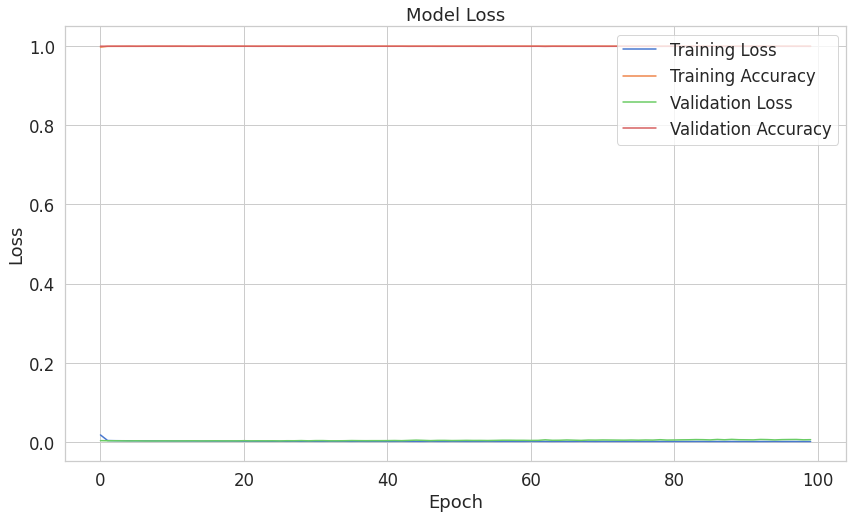

In [72]:
# Plotting Loss and Accuracy
plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_loss'])
plt.plot(history_df['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy'], loc='upper right');

In [73]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions = predictions.flatten()

In [74]:
predictions

array([2.9552424e-10, 3.6669494e-08, 6.3524158e-11, ..., 1.3623800e-18,
       8.8950285e-17, 5.0463773e-13], dtype=float32)

In [75]:
# Testing Model On Testing Data
testing = model.evaluate(test_data, test_labels)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0064 - accuracy: 0.9993


In [76]:

print(f"Test Loss: {testing[0]}")
print(f"Test Accuracy: {testing[1]}")

Test Loss: 0.006446849089115858
Test Accuracy: 0.9992860555648804


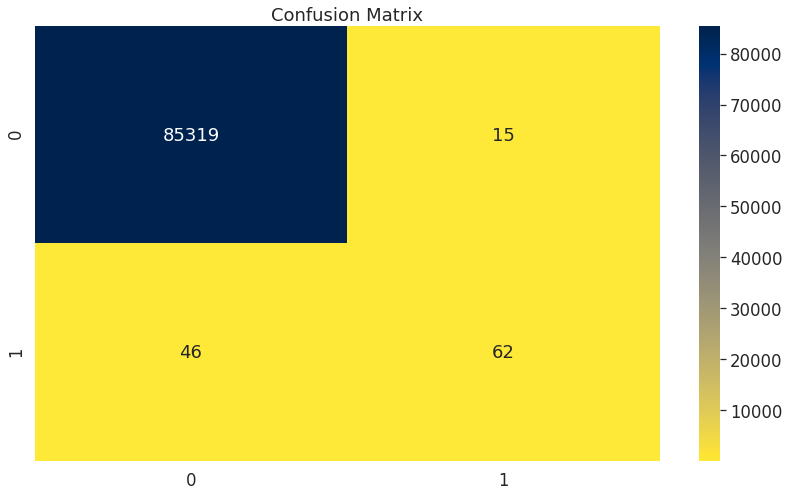

In [77]:

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
# y_pred = model.predict(X_test)
y_test = pd.DataFrame(testing)
cm = confusion_matrix(test_labels, predictions.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Confusion Matrix")
plt.show()

## Unbalanced Data
### As we can see that our model is overfitted because it is most probably unable to discriminate between valid transactions and fraud transactions because the mass of fraud transactions is very low as compared to the valid transactions and our model can treat them as normal transactions. Lets overcome this problem.


In [78]:
# Checking Dataset To Ensure That It IS Not Changed
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Building Second Model For Overcoming Unbalanced Data Problem

In [79]:
# Standardizing The Amount Feature
df['NormAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)

In [80]:
# Separating Test Data
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

In [81]:
# Importing SMOTE 
from imblearn.over_sampling import SMOTE
np.random.seed(9)

In [ ]:
# Counting The Number Of Fraud And Valid Transactions
all_records= len(df)
number_records_fraud = len(df[df.Class == 1])
print(f"No. Of Transactions: {all_records}, Fraud Transactions: {number_records_fraud}")

In [40]:
# Applying SMOTE
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

ValueError: ignored

In [ ]:
# Transforming Into Pandas DataFrame
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [ ]:
# Splitting The Dataset Into Training And Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)

In [ ]:
# Making Second Model
model2 = Sequential()
model2.add(Dense(16, kernel_initializer='uniform', activation = 'relu', input_shape = (29,)))
model2.add(Dense(18, kernel_initializer='uniform', activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(20, kernel_initializer = 'uniform', activation='relu'))
model2.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model2.summary()

In [ ]:
# Compilation Step
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting Second Model On 5 Epochs
model2.fit(np.array(X_train), np.array(Y_train), batch_size=15, epochs=5)

In [ ]:
# Testing Second Model On Test Data
score = model2.evaluate(np.array(X_test), np.array(Y_test), batch_size=128)
print('\nTesting Score Is: ', score[1] * 100, '%')

In [ ]:
# Defining Function For Confusion Matrix

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Lable')
    plt.xlabel('Predicted Label')

In [ ]:
y_pred = model2.predict(np.array(X_test))

In [ ]:
Y_test = pd.DataFrame(Y_test)
Y_test.shape

In [ ]:
# Plotting Confusion Matrix
cnf_matrix = confusion_matrix(Y_test,y_pred.round())
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [ ]:
y_pred = model2.predict(np.array(X))# Plotting Confusion Matrix

cnf_matrix = confusion_matrix(y,y_pred.round())
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [ ]:
# Saving Appropriate Model
model2.save('CreditCardFraudDetectionModel.h5')